### Distributii de probabilitate continue

Variabilele aleatoare continue si functiile (metodele)  aferente (densitatea de probabilitate, functia de repartitie, inversa functiei de repartitie, simulatorul distributiei, etc)             sunt definite in subpachetul `scipy.stats`.                                                 

In acest notebook prezentam modalitatea de lucru in `Python` cu cateva dintre distributiile de probabilitate continue, studiate.
Cum majoritatea distributiilor  depind de cel putin un parametru, ilustram interactiv cum se schimba
graficul densitatii de probabilitate cand se schimba unul sau mai multi parametri. Din motive de securitate, interactivitatea este posibila doar in notebook, nu si in fisierul html rezultat prin convertire.

Pentru a putea rula acest notebook, trebuie sa faceti un update la Anaconda. In `cmd` sau terminal inserati comanda:

`conda update conda`

Dupa ce s-a instalat ultima versiune pentru conda (un `packaging system`, folosit pt Anaconda)
dati comanda:

`conda update Anaconda`

fara a descarca ultima versiune de Anaconda.

Cine nu are instalata Anaconda, anterior, o descarca de [aici](http://continuum.io/downloads) si o instaleaza urmand etapele  din acest  [notebook](http://nbviewer.ipython.org/github/empet/LinAlgCS/blob/master/PythonIPythonN.ipynb).

Dupa update  mai activati si `pip` (un instrument pentru instalarea si managementul pachetelor Python) pentru a putea instala si pachete Python care nu sunt incluse in distributia Anaconda. Si anume, dati comanda:

`conda install pip`

Mai jos aveti un exemplu de instalare apeland `pip`.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn

from IPython.html.widgets import interact, interactive, fixed#functii necesare pt interactivitate
from IPython.display import clear_output, display, HTML

rcdef = plt.rcParams.copy()
plt.rcParams['figure.figsize'] = 5, 3

`seaborn` este o biblioteca destinata [vizualizarii in statistica](http://www.stanford.edu/~mwaskom/software/seaborn/index.html). Nu este inclusa in distributia Anaconda. Se bazeaza pe `matplotlib` si se instaleaza folosind `pip`. In `cmd` sau terminal se da comanda:

`pip install seaborn`

fara sa descarcati in prealabil `seaborn`. 

`pip` "se ocupa" de cautarea pachetului pe web si de instalarea lui.



Culorile din paleta de baza a `seaborn` sunt:

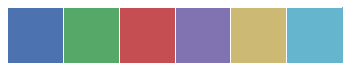

In [3]:
seaborn.palplot(seaborn.color_palette())

Pentru a le folosi in acest notebook in locul culorilor oferite de `matplotlib`, le salvam in
`colors`:

In [4]:
colors=seaborn.color_palette()# colors[i] va fi culoarea i, i=0,...5


In continuare evidentiem modalitatea de lucru cu  variabile aleatoare continue, ce sunt instante ale clasei `scipy.stats.NumeDistributie`.
Mai multe detalii [aici](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

Pentru a declara o variabila aleatoare si apoi pentru a apela metodele aferente
se poate proceda [astfel](http://docs.scipy.org/doc/scipy/reference/stats.html):

`V=st.numeDistributie(shape, loc=val1, scale=val2)`, unde `loc` si `scale` sunt cuvinte cheie care se seteaza adecvat pentru fiecare distributie, iar shape este un parametru ce controleaza forma densitatii de probabilitate.

Numele distributiilor tratate in acest notebook sunt:
    
- `expon`,  distributia exponentiala
- `pareto`, distributia Pareto
- `norm`, distributia normala

Pentru variabila aleatoare `V` se poate apela apoi:
    
- densitatea de probabilitate, `V.pdf()`
- functia de repartitie, `V.cdf()`
- inversa functiei de repartitie pe intervalul pe care este inversabila, `V.ppf()` (`ppf`=percent point function)
- simulatorul distributiei, `V.rvs(size=100)`, unde `size`= numarul valorilor generate
- valoarea medie, dispersia si respectiv abaterea standard, `V.mean(), V.var(), V.std()` 

### Distributia exponentiala de parametru $\theta$

Densitatea de probabilitate a distributiei exponentiale, $Exp(\theta)$, este:   
$f(x;\theta)=\left\{\begin{array}{ll}  0& x<0\\ \displaystyle\frac{1}{\theta}e^{-x/\theta}&x\geq 0\end{array}\right.$

O modalitate  de a defini o variabila aleatoare `V`, ce are distributia  $Exp(\theta)$ este urmatoarea:

In [5]:
theta=2.0
V=st.expon(scale=theta)# se declara variabila aleatoare exponential distribuita
                       #de parametru theta=2

O astfel de definitie a variabilei aleatoare se numeste "inghetata" (`frozen random variable`), in sensul
ca parametrul `theta` a fost setat si acum orice apel $V.pdf()$, $V.rvs()$, etc, se face pentru metoda aferenta distributiei
corespunzatoare acestui  `theta`.

Media M(V)= 2.0


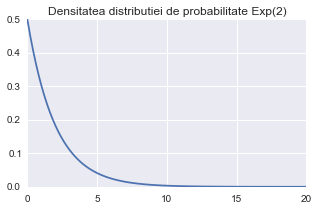

In [8]:
x=np.linspace(0,20, 100)
y=V.pdf(x)
plt.title('Densitatea distributiei de probabilitate Exp(2)')
plt.plot(x, y)
print 'Media M(V)=', V.mean()

O alta modalitate este  sa nu inghetam definitia, ci sa apelam  metodele pentru o variabila aleatoare, 
`st.expon`, cu argumentele
 si  cuvintele cheie caracteristice, distributiei ei.

De exemplu,  pentru a trasa functia de repartitie a variabilei corespunzatoare lui `theta=1.5` sau pentru a calcula
dispersia pentru $Exp(1.5)$   apelam metodele aferente unei variabile aleatoare `st.expon`, astfel:


Dispersia pentru Exp(1.5): 2.25


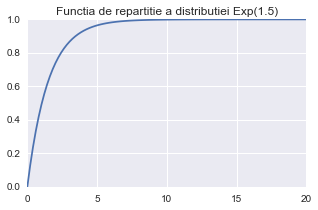

In [9]:
theta=1.5
x=np.linspace(0,20, 100)
y=st.expon.cdf(x,scale=theta)
plt.title('Functia de repartitie a distributiei Exp(1.5)')
plt.plot(x,y)

print 'Dispersia pentru Exp(1.5):', st.expon.var(scale=theta)

Pentru a vizualiza dependenta densitatii $Exp(\theta)$ de parametrul $\theta$ folosim functia `interact`
care faciliteaza comunicarea dintre  `Python` si `JavaScript` in timp real si permite sa interactionam cu graficul densitatii.

Definim functia care deseneaza graficul densitatii pentru un `theta` dat. 
Spre deosebire de exemplele de mai sus, si din alte notebook-uri postate, aici folosim `matplotlib` [obiectual](http://matplotlib.org/users/artists.html):

In [10]:
def Expopdf(theta):
    V=st.expon(scale=theta)
    x=np.linspace(0,10,100)
    y=V.pdf(x)# 
    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.fill_between(x, y,  alpha=0.3)
    ax.set_xlim(0,10)
    ax.set_ylim(0,2)
    ax.set_title(r'Variatia densitatilor de probabilitate $Exp(\theta)$')

Apelam functia `interact` care genereaza un widget si permite interactiunea cu graficul densitatii
via `JavaScript`. Actionand slider-ul se schimba valoarea lui $\theta$ in intervalul $[0.2, 5]$
si graficul corespunzator al densitatii:

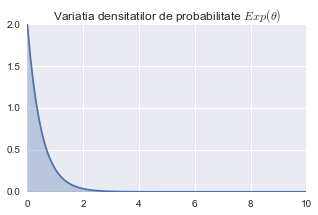

In [11]:
interact(Expopdf, theta=(0.5, 5.0, 0.5))

A se observa ca in $0$ densitatea ia valoarea $1/\theta$. Deci pe masura ce $\theta$ creste,
$1/\theta$ descreste.

Functia de repartitie a distributiei $Exp(\theta)$:
    $F(x)=\left\{\begin{array}{ll}0 & x<0\\1-e^{-x/\theta}& x\geq 0\end{array}\right.$

In [12]:

def Expocdf(theta):
    V=st.expon(scale=theta)
    x=np.linspace(0,10,100)
    y=V.cdf(x)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.fill_between(x, y,  alpha=.33)
    ax.set_title(r'Variatia functiilor de repartitie $Exp(\theta)$')
    ax.set_xlim(0,10)
    ax.set_ylim(0, 1.0)
    

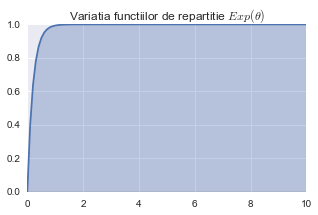

In [13]:
interact(Expocdf, theta=(0.2, 3.2))

Valoarea medie a distributiei $Exp(\theta)$ este $M(V)=\theta$, iar dispersia
$\sigma^2(V)=\theta^2$.



In [14]:
print 'Valoarea medie si dispersia sunt:', st.expon.mean(scale=2), st.expon.var(scale=2)

Valoarea medie si dispersia sunt: 2.0 4.0


Sa simulam acum variabila aleatoare $Exp(\theta=2.0)$, generand 1000 de valori de observatie.
Apoi trasam histograma datelor generate si deasupra ei, graficul densitatii pentru comparatie.

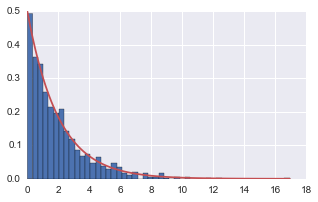

In [15]:
vals=V.rvs(size=1000)# apeleaza simulatorul ce implementeaza metoda inversarii pt Exp(theta)
histo=plt.hist(vals, bins=50, normed=True)
valM=np.max(vals)
x=np.linspace(0,valM, 100)
plt.plot(x, V.pdf(x), color=colors[2])

### Distributia Pareto

Distributia Pareto a fost introdusa de economistul italian V Pareto, ca distributie a veniturilor/averii
intr-o tara, oras, etc. El a formulat principiul 80/20, conform caruia $20\%$ din populatia unei tari
detine $80\%$ din averea totala. 
Acest principiu se  manifesta si in traficul internet: $20\%$ din paginile WEB, atrag $80\%$ din traficul internet.
    

 Densitatea ei de probabilitate depinde
 doi parametri $\alpha>0$ si $\beta> 0$:
        $$f(x)=\left\{\begin{array}{ll}  0& x<\beta\\
                     \displaystyle\frac{\alpha}{\beta}\left(\frac{\beta}{x}\right)^{\alpha+1}&x\geq \beta\end{array}\right.$$

In `scipy.stats` este implementata distributia Pareto corespunzatoare lui $\beta=1$, respectiv densitatea de probabilitate, functia de repartitie,  inversa ei, media, dispersia. Pentru a implementa/apela corect aceste functii pentru o variabila aleatoare Pareto  arbitrara,
notam cu
$V$ o variabila aleatoare ce are distributia $Pareto(\alpha, \beta=1)$ si cu $X$ o variabila aleatoare ce are distributia Pareto, $Pareto(\alpha, \beta \neq 1)$.  Sa deducem relatia intre densitatile de probabilitate $f_X$ si $f_V$, respectiv functiile de repartitie
$F_X$ si $F_V$, precum si intre invesersele lor. 

$F_V(x)= 1-1/x^\alpha$, $x\geq 1$, iar  $F_X(x)=1-(\beta/x)^{\alpha}$, $\forall\: x\geq \beta$.
Prin urmare:

$$F_X(x)=F_V(x/\beta), \quad\forall\: x\geq \beta$$

Derivand aceasta egalitate functionala obtinem:
relatia intre densitatile de probabilitate:

$$f_X(x)=\displaystyle\frac{1}{\beta}f_V(x/\beta), \quad \forall\: x\geq \beta$$


Inversa functiei de repartitie, ${F_V}_{|[1,\infty)}$, este $F_V^{-1}(u)=(1-u)^{-1/\alpha}$, iar
a lui ${F_X}_{|[\beta,\infty)}$, $F_X^{-1}(u)=\beta F_V^{-1}(u)$.

Declaram o variabila aleatoare Pareto standard (i.e. corespunzatoare lui $\beta=1$) astfel:

In [16]:
alpha=3.0
V=st.pareto(alpha)# 

Daca insa studiem o variabila aleatoare $X\sim Pareto(\alpha, \beta\neq 1)$, atunci exploatam relatiile de mai sus.

De exemplu  sa trasam densitatea de probabilitate a variabilei aleatoare $X$ de parametri $\alpha=3$ si $\beta=2$:

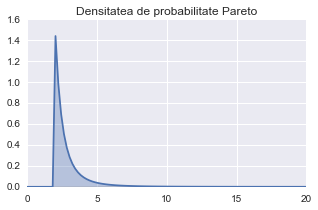

In [17]:
beta=2.0
x=np.linspace(0,20, 100)
y=(1.0/beta)*V.pdf(x/beta)
plt.plot(x,y)
plt.fill_between(x, y,  alpha=.33)
plt.title('Densitatea de probabilitate Pareto')

Sa ilustram acum dependenta graficului densitatii Pareto de cei doi parametri, $\beta$ si $\alpha$:

In [18]:
def Paretopdf(beta, alpha):
    x=np.linspace(0,20,100)
    y=(1.0/beta)*st.pareto.pdf(x/beta, alpha)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.fill_between(x, y,  alpha=.33)
    ax.set_title(r'Variatia densitatilor de probabilitate $Pareto(\alpha, \beta)$')
    ax.set_ylim(0,3)

<function __main__.Paretopdf>

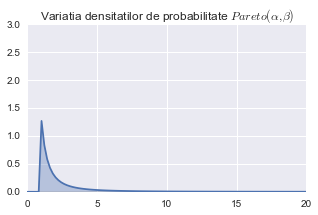

In [19]:
interact(Paretopdf, beta=(0.2, 2, 0.2), alpha=(0.1, 3, 0.3))

O alta modalitate de a vizualiza variatia graficului densitatii, cand unul din parametri este fix 
si celalalt variabil, consta in a colora diferit graficele corespunzatoare la parametri diferiti.

Fixam mai intai pe $\beta=1$ si desenam grafice pentru valori crescatoare ale lui $\alpha$:
    

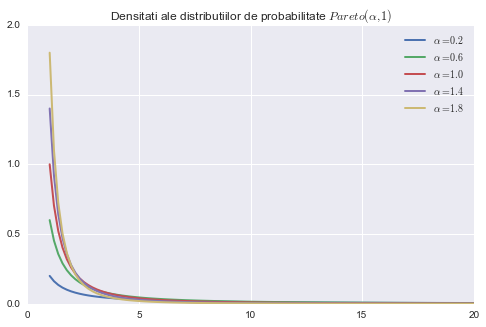

In [20]:
plt.rcParams['figure.figsize'] = 8, 5
fig, ax = plt.subplots()
beta=1
alphaVals=np.arange(0.2, 2.2, 0.4)
for alpha in alphaVals:
    x=np.linspace(beta,20, 100)
    y=st.pareto.pdf(x,alpha)
    ax.plot(x,y, lw=2, label=r'$\alpha = %.1f $'%alpha)
    ax.set_title(r'Densitati ale distributiilor de probabilitate $Pareto(\alpha, 1)$')
    ax.legend()    

Fixand  $\alpha=0.8$ si variind $\beta$ avem:

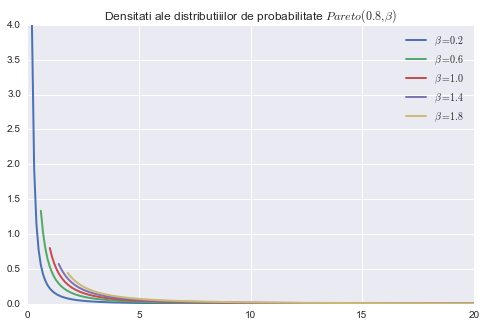

In [21]:
fig, ax = plt.subplots()
alpha=0.8
betaVals=np.arange(0.2, 2.2, 0.4)
for beta in betaVals:
    x=np.linspace(beta,20, 200)
    y=(1.0/beta)*st.pareto.pdf(x/beta,alpha)
    ax.plot(x,y, lw=2,  label=r'$\beta = %.1f $'%beta)
    ax.set_title(r'Densitati ale distributiiilor de probabilitate $Pareto(0.8, \beta)$')
    ax.legend()    

Am analizat in Cursul 15 media si dispersia distributiei Pareto si am concluzionat ca o variabila aleatoare
$X\sim Pareto(\alpha,\beta)$ are medie doar pentru $\alpha>1$ si in acest caz media este:
$$M(X)=\displaystyle\frac{\alpha\beta}{\alpha-1}$$

Variabila $X$ are dispersie doar pentru $\alpha>2$ si:
    $$\sigma^2(X)=\displaystyle\frac{\alpha\beta^2}{(\alpha-1)^2(\alpha-2)}$$

Remarcam ca daca $V\sim Pareto(\alpha, 1)$ are distributia Pareto standard, atunci
$M(X)=\beta M(V)$, iar $\sigma^2(X)=\beta^2\sigma^2(V)$.  

In concluzie:
- pentru  $\alpha\in(0,1]$,  o variabila aleatoare Pareto nu are medie nici dispersie.
- pentru $\alpha\in(1,2]$, o variabila aleatoare Pareto are medie finita si dispersie infinita
- pentru $\alpha>2$,  variabila are si medie si dispersie finita.


Distributia Pareto de medie finita si dispersie infinita a fost identificata ca 
fiind distributia de probabilitate:
- a duratei  serviciului procesorului pentru procesele sistemului de operare UNIX
- a  dimensiunii fisierelor stocate pe serverele WEB
- a lungimii intervalului de timp intre doua pachete succesive  de informatie in  traficul internet



Sa ilustram interactiv proprietatile deduse pentru media si dispersia distributiei Pareto:

In [22]:
plt.rcParams['figure.figsize'] = 5, 3

In [23]:
beta=0.5
def  ParetoMeanVar(alpha):
    V=st.pareto(alpha)# beta setat pe 1
    print 'media=', beta*V.mean()
    print 'dispersia=', beta**2*V.var()
    

In [24]:
interact(ParetoMeanVar, beta=0.5, alpha=(0.1, 3))

media= 1.40909090909
dispersia= inf


<function __main__.ParetoMeanVar>

Simulatorul distributiei Pareto standard implementeaza metoda inversarii,
adica  apeland `V.rvs(size=1000)` sunt returnate  1000 de valori de observatie asupra variabilei aleatoare $V\sim Pareto(\alpha, 1)$. 

Tinand seama de relatia intre inversele functiilor de repartitie ale  lui $V$ si  $X\sim Pareto(\alpha, \beta)$, rezulta ca pentru a simula variabila $X\sim Pareto(\alpha, \beta)$ procedam astfel:

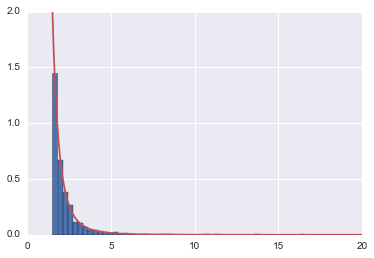

In [29]:
plt.rcParams['figure.figsize'] = 6, 4
V=st.pareto(3.0)# alpha a fost setat pe 3.0
beta=1.5
c=1.0/beta
fX=lambda x: c*V.pdf(c*x)
vals=beta*V.rvs(size=1000)
fig, ax=plt.subplots()
ax.hist(vals, bins=50, normed=True)
x=np.linspace(beta,20, 500)
ax.plot(x, fX(x) , color=colors[2])#seaborn dark red

Distributia Pareto se mai numeste si distributie cu coada lunga (`long tail distribution`),
ceea ce matematic se exprima prin:

$$\displaystyle\lim_{x\to\infty}e^{\lambda x}P(X>x)=\infty, \quad \forall \lambda>0$$

Intr-adevar, pentru $X\sim Pareto(\alpha, \beta)$, avem $P(X>x)=1-F_X(x)=(\beta/x)^{\alpha}$.  
Deoarece $e^{\lambda x}$ tinde mai rapid la infinit decat $x^\alpha$, proprietatea de coada lunga este evidenta.
                                                                  

### Distributia normala

O variabila aleatoare normal distribuita standard, $Z\sim N(0,1)$, are densitatea de probabilitate:

$f_Z(x)=\displaystyle\frac{1}{\sqrt{2\pi}}e^{-x^2/2}, x\in\mathbb{R}$

In [30]:
V=st.norm()

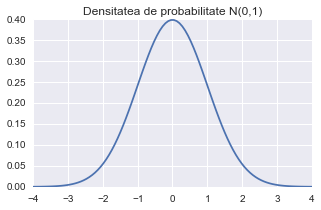

In [31]:
plt.rcParams['figure.figsize'] = 5, 3
x=np.linspace(-4, 4,100)
plt.title('Densitatea de probabilitate N(0,1)')
plt.plot(x, V.pdf(x))


O variabila aleatoare, $X\sim N(m,\sigma)$, normal distribuita de parametri $m, \sigma$, arbitrari, are densitatea de probabilitate:
$$f_X(x;m,\sigma)=\displaystyle\frac{1}{\sigma\sqrt{2\pi}}e^{-(x-m)^2/2\sigma^2}, x\in\mathbb{R}$$

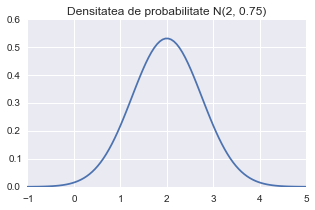

In [32]:
m=2
sigma=0.75
W=st.norm(loc=m, scale=sigma)
xx=np.linspace(m-4*sigma, m+4*sigma, 100)
plt.title('Densitatea de probabilitate N(2, 0.75)')
plt.plot(xx,W.pdf(xx))

Fixand parametrul  $\sigma$ si variind media, $m$, graficul densitatii corespunzatoare se translateaza
pe directia axei Ox. De aceea media se numeste si parametru de locatie (a axei de simetrie a graficului, in acest caz).

In [33]:
def MedieVar(m):
   sigma=1
   x=np.linspace(m-4*sigma, m+4*sigma, 100) 
   y=st.norm.pdf(x,loc=m, scale=sigma) 
   fig, ax = plt.subplots()
   ax.plot(x,y)
   ax.fill_between(x, y,  alpha=.33)
   ax.set_title(r'Variatia graficului densitatii $N(m,1)$') 
   ax.set_xlim(-4, 6) 

<function __main__.MedieVar>

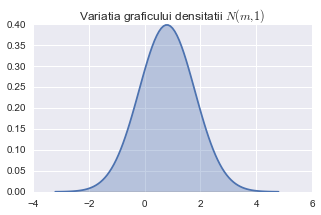

In [34]:
interact(MedieVar, m=(0,2, 0.2))

Fixand acum media pe 0 si variind abaterea standard, $\sigma$ avem:

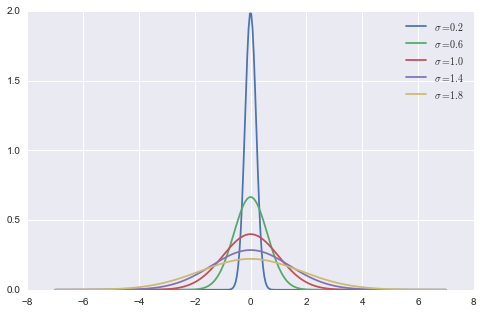

In [35]:
plt.rcParams['figure.figsize'] = 8, 5
fig, ax = plt.subplots()
m=0
sigmaVals=np.arange(0.2, 2.2, 0.4)
x=np.linspace(-7,7, 300)
for sigma in sigmaVals:
    y=st.norm.pdf(x,loc=0, scale=sigma)
    ax.plot(x,y, label=r'$\sigma = %.1f $'%sigma)
    ax.legend()    

Se observa ca pe masura ce abaterea standard creste, valorile unei varabile aleatoare $N(0,\sigma)$ sunt mai imprastiate in jurul mediei.

Functia de repartitie, $\Phi(x)=\displaystyle\frac{1}{\sqrt{2\pi}}\int_{-\infty}^xe^{-t^2/2}dt$ a distributiei normale
standard, $N(0,1)$, are graficul ilustrat mai jos in   stanga, iar inversa ei in dreapta:

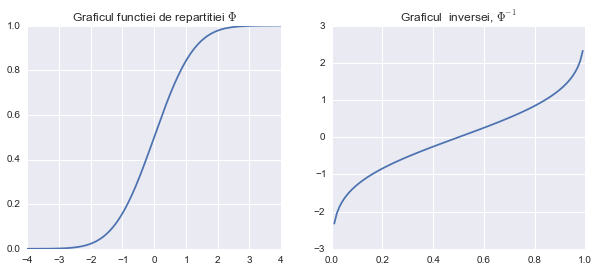

In [36]:
plt.rcParams['figure.figsize'] = 10, 4
fig=plt.figure()
ax1=fig.add_subplot(121)
x=np.linspace(-4,4, 200)
y=st.norm.cdf(x)
ax1.set_title('Graficul functiei de repartitiei $\Phi$')
ax1.plot(x,y)
ax2=fig.add_subplot(122)
u=np.linspace(0,1,100)
xx=st.norm.ppf(u)
ax2.set_title('Graficul  inversei, $\Phi^{-1}$')
ax2.plot(u,xx)


Sa calculam $\alpha$-cvantila distributiei $N(0,1)$, pentru $\alpha=0.4$ si $\alpha=0.78$:

In [37]:
print 'alpha cvantila 0.4 si respectiv 0.78 este:', st.norm.ppf([0.4, 0.78]) 

alpha cvantila 0.4 si respectiv 0.78 este: [-0.2533471   0.77219321]


Prin urmare $z_{0.4}\approx-0.25$, iar $z_{0.78}\approx 0.77$.

Histograma valorilor generate de  simulatorul distributiei normale $N(1.5, 0.8)$:

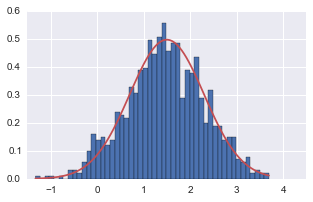

In [38]:
plt.rcParams['figure.figsize'] = 5, 3
X=st.norm(loc=1.5, scale=0.8)
fig,ax=plt.subplots()
ax.set_xlim(-1.5, 4.5)
vals=X.rvs(size=1000)
histo=plt.hist(vals, bins=50, normed=True)
x=np.linspace(np.min(vals), np.max(vals), 100)
ax.plot(x, X.pdf(x), color=colors[2])              

### Mixtura Gaussiana 1D

Sa construim o mixtura din trei distributii normale, $f=p_0f_0+p_1f_1+p_2f_2$, numita *mixtura Gaussiana*:
    

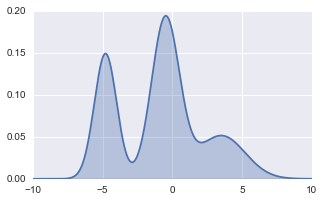

In [39]:
p=[0.3, 0.48, 0.22]#probabilitatile din definitia mixturii
m=[-4.8, -0.5, 3.5]#lista mediilor celor 3 distributii
sigma=[0.8, 1.0, 1.7]# lista abaterilor standard
x=np.linspace(-10,10, 1000)
y=np.zeros(x.shape)
for i in range(3):
    y+=p[i]*st.norm.pdf(x,loc=m[i], scale=sigma[i])
plt.plot(x,y)
plt.fill_between(x, y,  alpha=.33)

In [47]:
def  simDiscrete(pr):
    k=0
    F=pr[0]
    u=np.random.random()
    while(u>F):
        k+=1
        F=F+pr[k]
    return k

In [48]:
def  GaussianMixture1D(N, p, m,sig):
   dis=[simDiscrete(p) for i in xrange(N)]#genereaza N observatii asupra distr discrete

   vals=np.empty(N, dtype=float)# vals va contine valorile generate ale mixturii
   n=len(p)
   for k in range(n):
       I=[j for j in range(N) if dis[j] == k]# lista indicilor elementelor listei dis, egale 
                                             #cu k (k=0, 1,  ..., m-1) 
       s=len(I)
       va=st.norm.rvs(size=s, loc=m[k], scale=sig[k])#generam atatea valori din f_k
                                                     #cat este lungimea lui I
       vals[I]=va # in pozitiile I copiem valorile generate
   return vals


Generam $N=1000$ de valori din mixtura de mai sus:

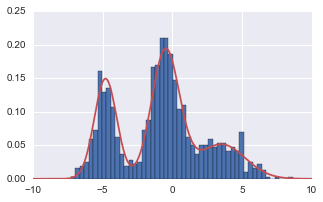

In [52]:
N=1000
vals=GaussianMixture1D(N,p, m, sigma)

histo=plt.hist(vals, bins=50, normed=True)
plt.plot(x,y, color=colors[2])



Histograma valorilor generate are  alura graficului densitatii mixturii.


Histogramele de culoare ale imaginilor digitale au deobicei distributia unei mixturi Gaussiene.

In [1]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()